### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Алламе Ормиз
##### Группа:  НФИбд-01-21

## Москва 2024
***

### Вариант № 21

Для закрепленного за Вами варианта лабораторной работы:

# 1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
name = 'arrhythmia.data'
target = 1
feature = 161

In [3]:
df = pd.read_csv(f"../data/{name}",
                 delimiter=",", header=None, on_bad_lines='skip')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,5

# 2. Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 

In [4]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 452
Число признаков = 280
Число пропущенных значений:
	0: 0
	1: 0
	2: 0
	3: 0
	4: 0
	5: 0
	6: 0
	7: 0
	8: 0
	9: 0
	10: 8
	11: 22
	12: 1
	13: 376
	14: 1
	15: 0
	16: 0
	17: 0
	18: 0
	19: 0
	20: 0
	21: 0
	22: 0
	23: 0
	24: 0
	25: 0
	26: 0
	27: 0
	28: 0
	29: 0
	30: 0
	31: 0
	32: 0
	33: 0
	34: 0
	35: 0
	36: 0
	37: 0
	38: 0
	39: 0
	40: 0
	41: 0
	42: 0
	43: 0
	44: 0
	45: 0
	46: 0
	47: 0
	48: 0
	49: 0
	50: 0
	51: 0
	52: 0
	53: 0
	54: 0
	55: 0
	56: 0
	57: 0
	58: 0
	59: 0
	60: 0
	61: 0
	62: 0
	63: 0
	64: 0
	65: 0
	66: 0
	67: 0
	68: 0
	69: 0
	70: 0
	71: 0
	72: 0
	73: 0
	74: 0
	75: 0
	76: 0
	77: 0
	78: 0
	79: 0
	80: 0
	81: 0
	82: 0
	83: 0
	84: 0
	85: 0
	86: 0
	87: 0
	88: 0
	89: 0
	90: 0
	91: 0
	92: 0
	93: 0
	94: 0
	95: 0
	96: 0
	97: 0
	98: 0
	99: 0
	100: 0
	101: 0
	102: 0
	103: 0
	104: 0
	105: 0
	106: 0
	107: 0
	108: 0
	109: 0
	110: 0
	111: 0
	112: 0
	113: 0
	114: 0
	115: 0
	116: 0
	117: 0
	118: 0
	119: 0
	120: 0
	121: 0
	122: 0
	123: 0
	124: 0
	125: 0
	126: 0
	127: 0
	128: 0
	129:

In [5]:
df = df.dropna(axis=1, how='all')

In [6]:
df.dropna(subset=[feature], inplace=True)
df.dropna(subset=[target], inplace=True)

In [7]:
df.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
5        int64
6        int64
7        int64
8        int64
9        int64
10      object
11      object
12      object
13      object
14      object
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
30       int64
31       int64
32       int64
33       int64
34       int64
35       int64
36       int64
37       int64
38       int64
39       int64
40       int64
41       int64
42       int64
43       int64
44       int64
45       int64
46       int64
47       int64
48       int64
49       int64
50       int64
51       int64
52       int64
53       int64
54       int64
55       int64
56       int64
57       int64
58       int64
59       int64
60       int64
61       int64
62       int64
63       int64
64       int64
65       int64
66       i

In [8]:
df[target].value_counts()

1    249
0    203
Name: 1, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[target].value_counts()

1    249
0    203
Name: 1, dtype: int64

In [10]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,NaN,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


In [11]:
df = df.astype(float)

In [12]:
df = df.select_dtypes(exclude=['object'])

# 3. Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных. 

In [13]:
df.isna().sum().sum()

408

In [14]:
df.fillna(df.groupby(target).transform('mean'), inplace=True)

In [23]:
from sklearn.cluster import DBSCAN
print(df.shape)
dbscan = DBSCAN(eps=170)
labels = dbscan.fit_predict(df)
df_new = df[labels != -1]
print(df_new.shape)

(452, 280)
(331, 280)


In [24]:
df = df_new.copy()

# 4. Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 

In [25]:
from sklearn.preprocessing import MinMaxScaler
X = df.values
np.set_printoptions(precision=3)
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = df.columns

In [26]:
y = df[target].astype(int)
y1 = X[feature].astype(float)
X = pd.DataFrame(X).drop([feature],axis=1).astype(float)
X = X[X.columns[X.nunique() > 50]].values


In [27]:
X.shape

(331, 58)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

In [29]:
X = pd.DataFrame(X)
regression = Lasso()
regression.fit(X, y)

# Выбор 3 самых значимых признаков
importance = np.abs(regression.coef_)
top_features = np.argsort(importance)[-3:]
X_2 = X.iloc[:, top_features]

X_2.head(5)

,26,14,57
0,0.636923,0.486842,0.530214
1,0.480000,0.513158,0.426901
2,0.567692,0.486842,0.649123
3,0.544615,0.513158,0.660819
4,0.269231,0.473684,0.248538


In [30]:
X = X_2.values.copy()

# 5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

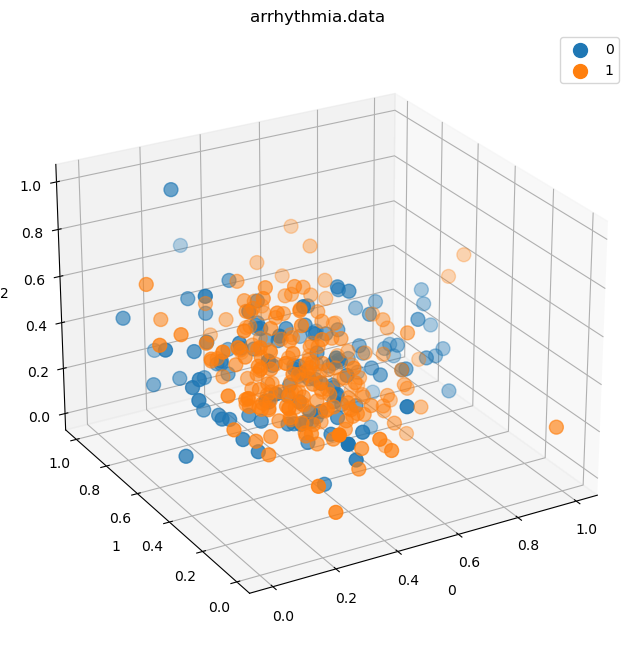

In [31]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in (y.unique()):
    row_ix = np.where(y== i)
    a=X[row_ix, 0]
    b=X[row_ix, 1]
    c=X[row_ix, 2]
    ax.scatter(a, b, c,s=100,label=i)

plt.title(name)
ax.set_xlabel(pd.DataFrame(X).columns[0])
ax.set_ylabel(pd.DataFrame(X).columns[1])
ax.set_zlabel(pd.DataFrame(X).columns[2])
plt.legend()

ax.view_init( azim=-120, elev=25 );

# 6. Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[:,0].reshape(-1,1), y1, test_size=0.3, random_state=666)

poly_reg = PolynomialFeatures()
lin_reg = LinearRegression()
param_grid1 = {'poly__degree': [2, 3, 4, 5]}
poly_lin_reg = Pipeline([('poly', poly_reg), ('linear', lin_reg)])
grid_search1_1 = GridSearchCV(poly_lin_reg, param_grid1, cv=5)
grid_search1_1.fit(X_train1, y_train1)
best_degree_poly1 = grid_search1_1.best_params_

model2 = Ridge()
param_grid2 = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
grid_search2_1 = GridSearchCV(model2, param_grid2, cv=5)
grid_search2_1.fit(X_train1, y_train1)
best2_1 = grid_search2_1.best_params_

model3 = DecisionTreeRegressor()
param_grid3 = {'max_leaf_nodes': [5, 6, 7, 8, 9, 10]}
grid_search3_1 = GridSearchCV(model3, param_grid3, cv=5)
grid_search3_1.fit(X_train1, y_train1)
best3_1 = grid_search3_1.best_params_

print(best_degree_poly1,best2_1,best3_1)

{'poly__degree': 2} {'alpha': 0.1} {'max_leaf_nodes': 5}


In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[:,1].reshape(-1,1), y1, test_size=0.3, random_state=666)

grid_search1_2 = GridSearchCV(poly_lin_reg, param_grid1, cv=5)
grid_search1_2.fit(X_train2, y_train2)
best_degree_poly2 = grid_search1_2.best_params_

grid_search2_2 = GridSearchCV(model2, param_grid2, cv=5)
grid_search2_2.fit(X_train2, y_train2)
best2_2 = grid_search2_2.best_params_

grid_search3_2 = GridSearchCV(model3, param_grid3, cv=5)
grid_search3_2.fit(X_train2, y_train2)
best3_2 = grid_search3_2.best_params_

print(best_degree_poly2,best2_2,best3_2)

{'poly__degree': 2} {'alpha': 1.0} {'max_leaf_nodes': 5}


In [35]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X[:,2].reshape(-1,1), y1, test_size=0.3, random_state=666)


grid_search1_3 = GridSearchCV(poly_lin_reg, param_grid1, cv=5)
grid_search1_3.fit(X_train2, y_train2)
best_degree_poly3 = grid_search1_3.best_params_

grid_search2_3 = GridSearchCV(model2, param_grid2, cv=5)
grid_search2_3.fit(X_train3, y_train3)
best2_3 = grid_search2_3.best_params_

grid_search3_3 = GridSearchCV(model3, param_grid3, cv=5)
grid_search3_3.fit(X_train3, y_train3)
best3_3 = grid_search3_3.best_params_

print(best_degree_poly2,best2_3,best3_3)

{'poly__degree': 2} {'alpha': 1.0} {'max_leaf_nodes': 5}


# 7. Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

In [36]:
labels=[poly_reg,model2,model3]

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error


def mspe(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred) / y_true)) * 100


scorer=mspe

In [38]:
X=pd.DataFrame(X)
X[3]=y1

In [39]:
scorer(grid_search1_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search2_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search3_1.best_estimator_.predict(X_test1), y_test1)

(13.362688783355441, 15.863850836581065, 12.23880732847288)

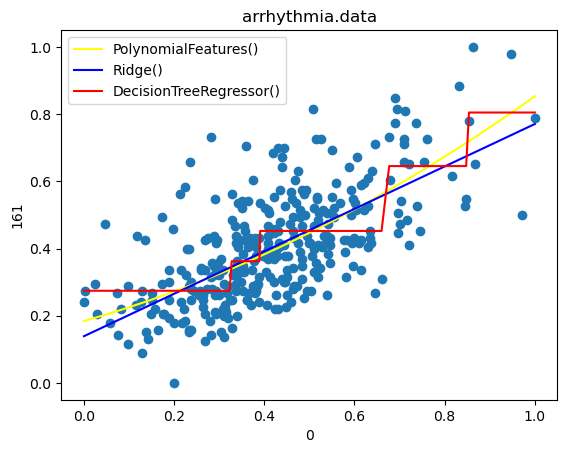

In [40]:
plt.scatter(X[0], X[3])
plt.plot(np.sort(X[0]), grid_search1_1.best_estimator_.predict(X[0].values.reshape(-1,1))[np.argsort(X[0])], color='yellow',label=labels[0])
plt.plot(np.sort(X[0]), grid_search2_1.best_estimator_.predict(X[0].values.reshape(-1,1))[np.argsort(X[0])], color='blue',label=labels[1])
plt.plot(np.sort(X[0]), grid_search3_1.best_estimator_.predict(X[0].values.reshape(-1,1))[np.argsort(X[0])], color='red',label=labels[2])
plt.title(name)
plt.xlabel(X.columns[0])
plt.ylabel(feature)
plt.legend()
plt.show()

In [41]:
scorer(grid_search1_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search2_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search3_2.best_estimator_.predict(X_test2), y_test2)

(15.696053213720784, 15.539577132788887, 17.71185281172509)

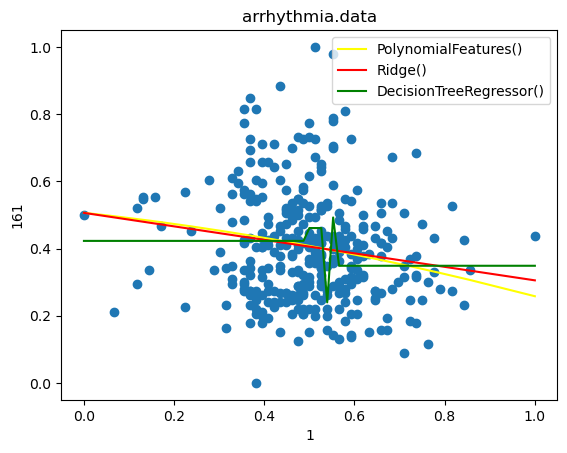

In [42]:
plt.scatter(X[1], X[3])
plt.plot(np.sort(X[1]), grid_search1_2.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='yellow',label=labels[0])
plt.plot(np.sort(X[1]), grid_search2_2.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='red',label=labels[1])
plt.plot(np.sort(X[1]), grid_search3_2.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='green',label=labels[2])
plt.title(name)
plt.xlabel(X.columns[1])
plt.ylabel(feature)
plt.legend()
plt.show()

In [43]:
scorer(grid_search1_3.best_estimator_.predict(X_test3), y_test3),scorer(grid_search2_3.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_3.best_estimator_.predict(X_test3), y_test3)

(15.089978947722827, 15.637520587167336, 16.138890636903735)

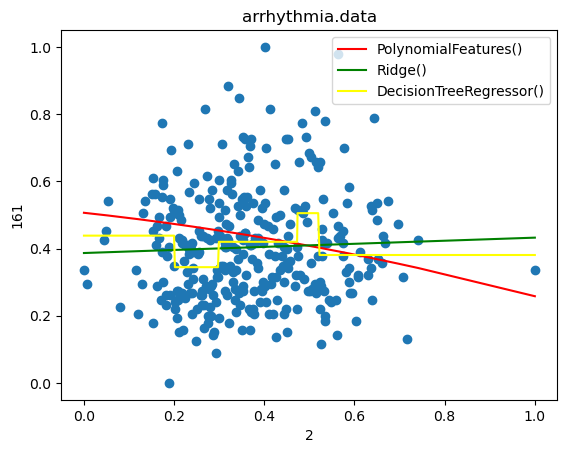

In [44]:
plt.scatter(X[2], X[3])
plt.plot(np.sort(X[2]), grid_search1_3.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='red',label=labels[0])
plt.plot(np.sort(X[2]), grid_search2_3.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='green',label=labels[1])
plt.plot(np.sort(X[2]), grid_search3_3.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='yellow',label=labels[2])
plt.title(name)
plt.xlabel(X.columns[2])
plt.ylabel(feature)
plt.legend()
plt.show()

# 8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.


In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error

def mspe(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred) / y_true)) * 100

scorer=max_error

In [46]:
scorer(grid_search1_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search2_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search3_1.best_estimator_.predict(X_test1), y_test1)

(0.3676534928236601, 0.36982443561361517, 0.3832762557077624)

In [47]:
scorer(grid_search1_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search2_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search3_2.best_estimator_.predict(X_test2), y_test2)

(0.5849141175577119, 0.5843474704706506, 0.48706240487062413)

In [48]:
scorer(grid_search1_3.best_estimator_.predict(X_test3), y_test3),scorer(grid_search2_3.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_3.best_estimator_.predict(X_test3), y_test3)

(0.5879591011360132, 0.5670269141191446, 0.5987303708653525)

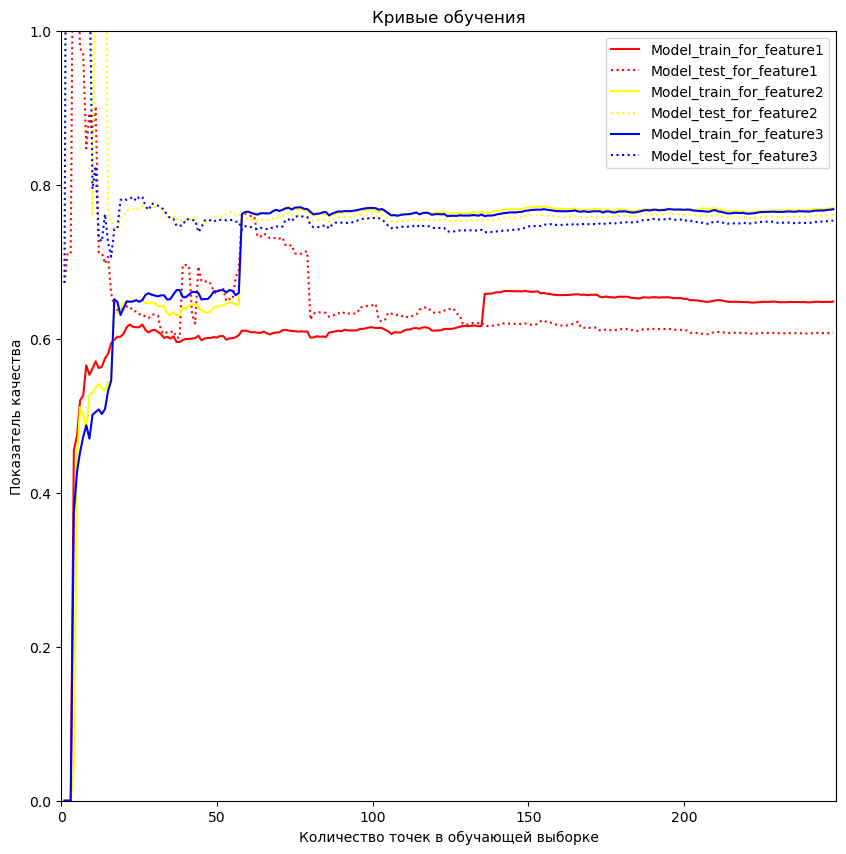

In [49]:
def plot_learning_curve(algo, algo2, algo3, X):
    train_score, train_score2, train_score3 = [], [], []
    test_score, test_score2, test_score3 = [], [], []
    X_train, X_test, y_train, y_test = train_test_split(X[0].values.reshape(-1, 1), X[3].values.reshape(-1, 1), random_state=666)

    for i in range(1, len(X_train) + 1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_score.append(scorer(y_test, y_test_predict))

    X_train, X_test, y_train, y_test = train_test_split(X[1].values.reshape(-1, 1), X[3].values.reshape(-1, 1), random_state=666)

    for i in range(1, len(X_train) + 1):
        algo2.fit(X_train[:i], y_train[:i])
        y_train_predict = algo2.predict(X_train[:i])
        train_score2.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo2.predict(X_test)
        test_score2.append(scorer(y_test, y_test_predict))

    X_train, X_test, y_train, y_test = train_test_split(X[2].values.reshape(-1, 1), X[3].values.reshape(-1, 1), random_state=666)

    for i in range(1, len(X_train) + 1):
        algo3.fit(X_train[:i], y_train[:i])
        y_train_predict = algo3.predict(X_train[:i])
        train_score3.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo3.predict(X_test)
        test_score3.append(scorer(y_test, y_test_predict))

    plt.figure(figsize=(10, 10))
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(train_score), label="Model_train_for_feature1", color='red')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(test_score), label="Model_test_for_feature1", linestyle='dotted', color='red')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(train_score2), label="Model_train_for_feature2", color='yellow')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(test_score2), label="Model_test_for_feature2", linestyle='dotted', color='yellow')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(train_score3), label="Model_train_for_feature3", color='blue')
    plt.plot([i for i in range(1, len(X_train) + 1)], 
             np.sqrt(test_score3), label="Model_test_for_feature3", linestyle='dotted', color='blue')
    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 1])
    plt.title('Кривые обучения')
    plt.xlabel('Количество точек в обучающей выборке')
    plt.ylabel('Показатель качества')
    plt.show()

plot_learning_curve(grid_search1_1.best_estimator_, grid_search1_2.best_estimator_, grid_search1_3.best_estimator_, X)